# Kickstarter Projects: Success or Bust?

Kickstarter is an online platform where users can help bring “creative projects to life” by donating to projects as they wish. As of 2019, there have been 445,000 projects in categories ranging from music, video games, stage shows and technology. Kickstarter allows unique projects and personal dreams to come into fruition. However, many projects do not get completed and donors can feel like they wasted their money. 


**Objective:** Utilize past data to predict whether a Kickstarter project will meet its initial donation goal.

1. Data Cleaning
    * Null values
    * Erroneous Values
2. **Exploratory Data Analysis**
    * **Visualizing dataset**
    * **Correlations**    
3. Data Preprocessing
    * Scale numerical features
    * One-hot encode categorical features
    * train_test_split dataset    
4. Modeling
    * Decision Tree/Random Forest Classifiers
    * Gradient Boosting Classifier
    * K-Nearest Neighbors Classifier
    * Hyperparameter Tuning
    
This project uses the dataset from the Kaggle dataset "Kickstarter Projects" found [here.](https://www.kaggle.com/kemical/kickstarter-projects?select=ks-projects-201801.csv)

### Import necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('data/cleaned_kickstarter.csv')
df.head(3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 00:00:00,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01 00:00:00,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:00:00,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000


In [3]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

Columns `deadline` and `launched` contain dates and must be converted to datetime columns|

In [4]:
df[['deadline', 'launched']] = df[['deadline', 'launched']].apply(pd.to_datetime)
df.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378654.000,378654.000,378654.000,378654.000,378654.000,378654.000,378654.000
mean,1074735245.057,49081.601,9683.158,105.619,6966.297,9059.092,45455.144
std,619087167.359,1183402.182,95636.885,907.193,78248.332,90974.176,1152960.699
min,5971.000,0.010,0.000,0.000,0.000,0.000,0.010
25%,538269621.500,2000.000,30.000,2.000,13.482,31.000,2000.000
50%,1075275650.000,5200.000,620.000,12.000,375.000,624.465,5500.000
75%,1610155033.750,16000.000,4076.000,56.000,3000.000,4050.000,15500.000
max,2147476221.000,100000000.000,20338986.270,219382.000,20338986.270,20338986.270,166361390.710


In [6]:
df['state'].value_counts()

failed        197719
successful    133956
canceled       38773
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [7]:
df['state'].value_counts(normalize = True)

failed       0.522
successful   0.354
canceled     0.102
undefined    0.009
live         0.007
suspended    0.005
Name: state, dtype: float64

It looks like most of the projects are either failed, successful, or canceled. A canceled project means a project has been ended before the deadline; because of this, I will consider a canceled project to be failed. 

In [8]:
df['state'] = df['state'].str.replace('canceled', 'failed')
df['state'].value_counts(normalize = True)

failed       0.625
successful   0.354
undefined    0.009
live         0.007
suspended    0.005
Name: state, dtype: float64

In [9]:
# How many categories are there and what does the distribution of categories look like?
df['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [10]:
num_categories = len(df['main_category'].unique())
print(f'There are {num_categories} categories in this dataset.')

There are 15 categories in this dataset.


In [11]:
df['main_category'].value_counts()

Film & Video    63583
Music           51917
Publishing      39873
Games           35231
Technology      32569
Design          30069
Art             28152
Food            24602
Fashion         22816
Theater         10912
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [12]:
df['main_category'].value_counts(normalize = True)

Film & Video   0.168
Music          0.137
Publishing     0.105
Games          0.093
Technology     0.086
Design         0.079
Art            0.074
Food           0.065
Fashion        0.060
Theater        0.029
Comics         0.029
Photography    0.028
Crafts         0.023
Journalism     0.013
Dance          0.010
Name: main_category, dtype: float64

### Subsetting Dataset
Only a few columns will be used in this portion as certain column, such as ID and name, will not help in determining whether a project is more likely to succeed.

In [13]:
df.drop(['ID', 'name'], axis =1, inplace = True)
df.head(3)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,failed,0,GB,0.000,0.000,1533.950
1,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,failed,15,US,100.000,2421.000,30000.000
2,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,failed,3,US,220.000,220.000,45000.000


To make analysis a little bit easier, only the projects that are either `failed` or `successful` in the `state` column will be considered. Only ~2% of the projects are classified `undefined`, `live`, and `suspended`, thus removing these projects from the dataset will not affect the analysis significantly. 

In [14]:
df = df[(df['state'] == 'failed') | (df['state'] == 'successful')]
df['state'].value_counts()

failed        236492
successful    133956
Name: state, dtype: int64

### Feature Engineering

Analysis will be easier using a new column of data with the amount of days between the launched and deadline dates.

In [15]:
df['days_until_deadline'] = (df['deadline'] - df['launched']).dt.days


In [16]:
df['state'] = df['state'].replace(['failed', 'successful'], [0,1]) #change 'failed' and 'successful' to 0's and 1s respectively
df.head(3)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline
0,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,0,0,GB,0.000,0.000,1533.950,58
1,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,0,15,US,100.000,2421.000,30000.000,59
2,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,0,3,US,220.000,220.000,45000.000,44


### Visualizing the Dataset

In [47]:
mean_by_category = df.groupby('main_category').mean()
mean_by_category

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline,percent_achieved_real
main_category,,,,,,,,,
Art,41101.598,3617.741,0.413,42.380,2552.839,3236.016,39468.501,31.585,251.107
Comics,20341.755,6945.244,0.545,135.629,5385.997,6653.781,19675.773,33.121,641.719
Crafts,11541.002,2030.560,0.244,27.629,1196.830,1651.409,10423.093,30.526,247.781
Dance,10188.805,3716.805,0.626,43.097,2985.581,3477.962,9408.592,32.078,81.207
Design,46884.710,27134.792,0.357,241.602,17219.195,24547.721,42200.737,33.410,205.593
Fashion,24875.859,6598.744,0.249,61.901,4326.865,5762.372,22530.495,31.801,98.762
Film & Video,84000.414,6453.472,0.379,67.289,5563.198,6248.348,82378.240,34.296,153.382
Food,48239.457,5357.319,0.251,54.404,4243.114,5140.292,48661.356,33.019,84.385
Games,50728.705,22094.252,0.361,325.570,16512.710,21288.433,45148.244,31.506,755.394


In [18]:
median_by_category = df.groupby('main_category').median()
median_by_category

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline
main_category,,,,,,,,
Art,3000.000,434.500,0,10,280.000,431.605,3000.000,29
Comics,3500.000,1500.000,1,40,926.000,1506.500,3500.000,29
Crafts,2400.000,97.000,0,3,55.000,95.000,2330.350,29
Dance,3300.000,1850.000,1,27,1335.980,1865.565,3310.000,29
Design,10000.000,1983.000,0,29,1170.000,1926.000,10000.000,29
Fashion,5600.000,244.000,0,5,146.000,245.000,5983.550,29
Film & Video,7000.000,747.000,0,12,543.045,760.000,7000.000,29
Food,10000.000,260.000,0,6,165.000,260.000,10000.000,29
Games,8000.000,1320.000,0,30,794.000,1324.960,8000.000,29


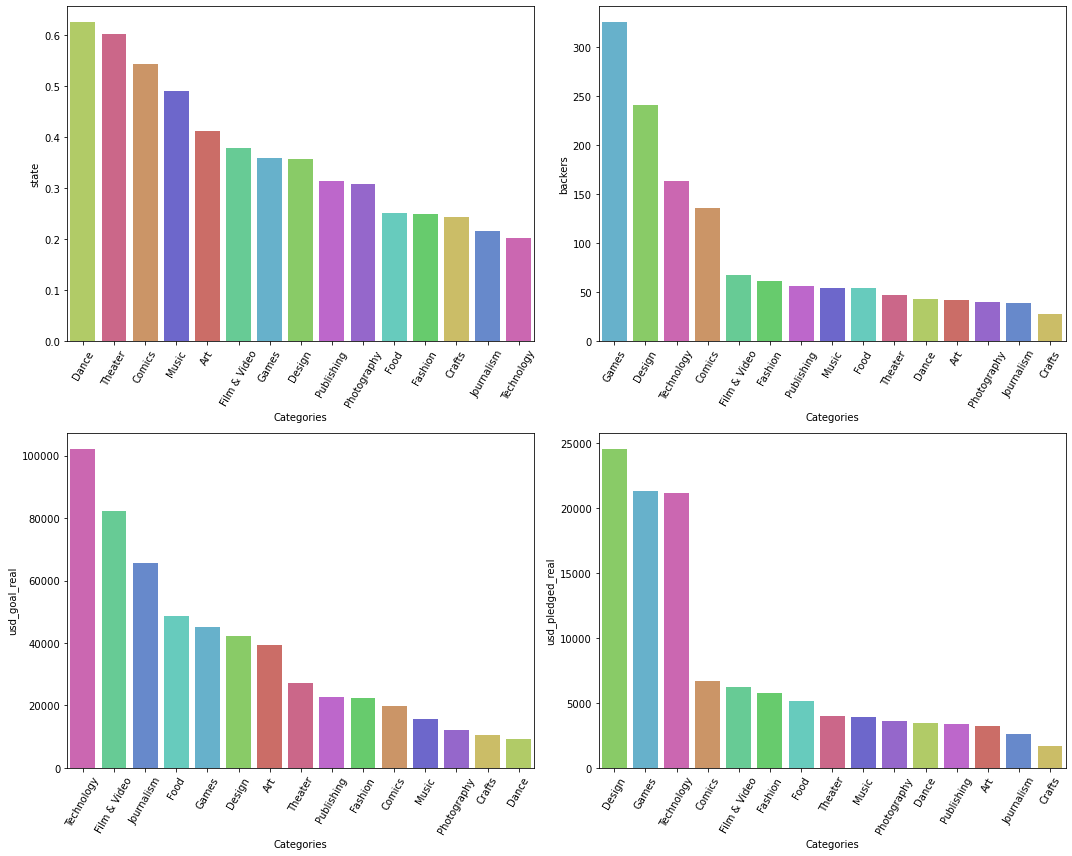

In [19]:
#fig, axes = plt.subplots(2,2)
import itertools

columns_to_plot = ['state', 'backers', 'usd_goal_real', 'usd_pledged_real']

fig, axes = plt.subplots(2,2, figsize = (15,12))

categories = mean_by_category.index
sns.set_palette('hls', n_colors = len(categories))

plot_palette = dict(zip(categories, sns.color_palette(n_colors = len(categories))))

for i in range(4):
    row = i // 2
    col = i % 2
    x_vals = mean_by_category[columns_to_plot[i]].sort_values(ascending = False).index
    y_vals = mean_by_category[columns_to_plot[i]].sort_values(ascending = False).values
    
    curr_ax = axes[row,col]

    sns.barplot(x = x_vals, y = y_vals, ax = curr_ax, palette = plot_palette)
    
    curr_ax.tick_params('x', rotation = 60)
    curr_ax.set_xlabel('Categories')
    curr_ax.set_ylabel(columns_to_plot[i])

plt.tight_layout()

A lot of interesting observations can be made from the 4 plots generated above. We can see that dance projects have a higher probability of being completed with around 62.5% of past projects being completed. This could be attributed to the fact that dance projects have the lowest goal amount set. On the other hand, projects that are in the technology category have the lowest chance of success, with only around 20.3% of past projects being completed, while also having the highest amount dollars set for their goal (an average of around $102,154). 

Projects that fall within the games and design technology both have the highest average amount of backers and dollars pledged to the goal. From this, it would be interesting to see which categories have a higher proportion of their goal amount achieved. Also, creating a new feature to find the average donation per backer would be provide interesting analytical insight, but I'm not sure whether it would help in predicting which projects have a higher chance of success. 

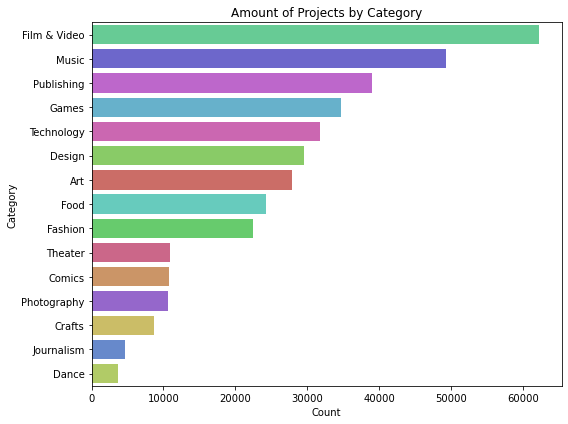

In [55]:
categories_count = df['main_category'].value_counts()

plt.figure(figsize = (8,6))
sns.barplot(x = categories_count.values, y = categories_count.index, palette = plot_palette)
plt.title('Amount of Projects by Category')
plt.ylabel('Category')
plt.xlabel('Count')
plt.tight_layout()
plt.savefig('figures/projects_by_category.png', dpi = 300)
plt.show()

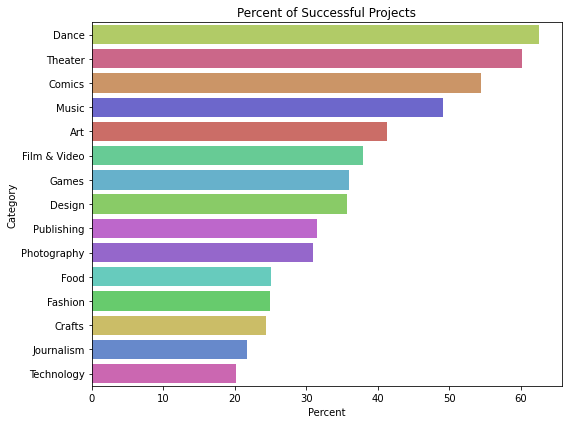

In [56]:
mean_by_category.reset_index(level = 0, inplace = True)
mean_by_category.sort_values('state', inplace = True, ascending = False)
plt.figure(figsize = (8,6))
sns.barplot(x = mean_by_category.state*100, y = mean_by_category.main_category, palette = plot_palette)
plt.title('Percent of Successful Projects')
plt.ylabel('Category')
plt.xlabel('Percent')
plt.tight_layout()
plt.savefig('figures/percent_success.png', dpi = 300)
plt.show()

In [60]:
df['goal'].mean()

48642.68657401308

In [21]:
df['percent_achieved_real'] = (df['usd_pledged_real'] / df['usd_goal_real'])*100 
df.head(3)

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline,percent_achieved_real
0,Poetry,Publishing,GBP,2015-10-09,1000.000,2015-08-11 12:12:28,0.000,0,0,GB,0.000,0.000,1533.950,58,0.000
1,Narrative Film,Film & Video,USD,2017-11-01,30000.000,2017-09-02 04:43:57,2421.000,0,15,US,100.000,2421.000,30000.000,59,8.070
2,Narrative Film,Film & Video,USD,2013-02-26,45000.000,2013-01-12 00:20:50,220.000,0,3,US,220.000,220.000,45000.000,44,0.489


In [22]:
df['percent_achieved_real'].describe()

count     370448.000
mean         327.276
std        26974.856
min            0.000
25%            0.480
50%           13.667
75%          106.667
max     10427789.000
Name: percent_achieved_real, dtype: float64

In [23]:
df.groupby('main_category')['percent_achieved_real'].describe()

,count,mean,std,min,25%,50%,75%,max
main_category,,,,,,,,
Art,27862.000,251.107,17615.075,0.000,0.900,22.712,109.937,2758823.000
Comics,10720.000,641.719,11327.999,0.000,8.100,103.423,145.981,551400.000
Crafts,8661.000,247.781,13619.002,0.000,0.120,4.690,71.400,1257515.000
Dance,3736.000,81.207,176.029,0.000,9.617,101.641,111.044,10000.000
Design,29515.000,205.593,2192.325,0.000,2.453,22.783,119.345,206700.000
Fashion,22425.000,98.762,3241.710,0.000,0.100,5.698,100.000,468400.000
Film & Video,62280.000,153.382,8058.423,0.000,0.400,13.447,104.312,1506600.000
Food,24265.000,84.385,3655.859,0.000,0.080,3.924,100.000,554928.300
Games,34723.000,755.394,33800.565,0.000,1.333,20.326,131.812,4153501.000


Just from a quick observation of the table generated above, the distribution of `percent_achieved_real` is heavily skewed with some categories having a maximum value of <1,000,000%. Visualizing this new feature would be more appropriate using the median value instead of the mean.

In [24]:
# Update median and mean groupby's with new feature added
mean_by_category = df.groupby('main_category').mean()
median_by_category = df.groupby('main_category').median()

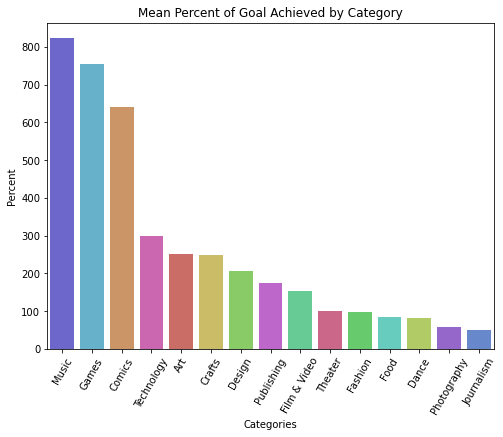

In [25]:
mean_percent_achieved_category = mean_by_category['percent_achieved_real'].sort_values(ascending = False)
plt.figure(figsize = (8,6))
sns.barplot(x = mean_percent_achieved_category.index, y = mean_percent_achieved_category.values, palette = plot_palette)
plt.xticks(rotation = 60)
plt.title('Mean Percent of Goal Achieved by Category')
plt.xlabel('Categories')
plt.ylabel('Percent')
plt.show()

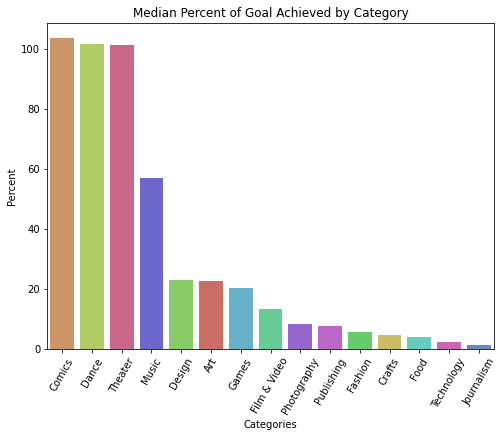

In [26]:
median_percent_achieved_category = median_by_category['percent_achieved_real'].sort_values(ascending = False)
plt.figure(figsize = (8,6))
sns.barplot(x = median_percent_achieved_category.index, y = median_percent_achieved_category.values, palette = plot_palette)
plt.xticks(rotation = 60)
plt.title('Median Percent of Goal Achieved by Category')
plt.xlabel('Categories')
plt.ylabel('Percent')
plt.show()

In [27]:
df.corr()

,goal,pledged,state,backers,usd pledged,usd_pledged_real,usd_goal_real,days_until_deadline,percent_achieved_real
goal,1.000,0.008,-0.025,0.004,0.006,0.005,0.939,0.023,-0.000
pledged,0.008,1.000,0.112,0.717,0.857,0.953,0.005,0.006,0.009
state,-0.025,0.112,1.000,0.129,0.098,0.111,-0.024,-0.118,0.015
backers,0.004,0.717,0.129,1.000,0.698,0.752,0.005,-0.002,0.017
usd pledged,0.006,0.857,0.098,0.698,1.000,0.906,0.006,0.006,0.006
usd_pledged_real,0.005,0.953,0.111,0.752,0.906,1.000,0.006,0.007,0.009
usd_goal_real,0.939,0.005,-0.024,0.005,0.006,0.006,1.000,0.022,-0.000
days_until_deadline,0.023,0.006,-0.118,-0.002,0.006,0.007,0.022,1.000,0.002
percent_achieved_real,-0.000,0.009,0.015,0.017,0.006,0.009,-0.000,0.002,1.000


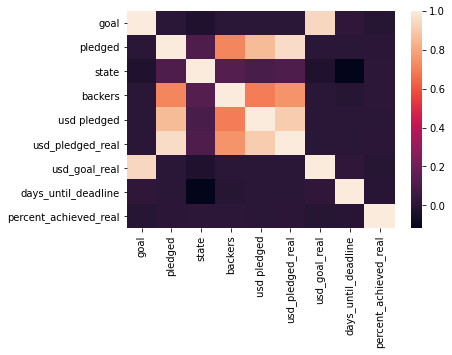

In [28]:
sns.heatmap(df.corr())
plt.show()

In [61]:
# Correlation heatmap without redundant columns
df_no_redundancies = df[df.columns.difference(['goal', 'pledged', 'usd pledged'])]
df_no_redundancies.corr()

,backers,days_until_deadline,percent_achieved_real,state,usd_goal_real,usd_pledged_real
backers,1.000,-0.002,0.017,0.129,0.005,0.752
days_until_deadline,-0.002,1.000,0.002,-0.118,0.022,0.007
percent_achieved_real,0.017,0.002,1.000,0.015,-0.000,0.009
state,0.129,-0.118,0.015,1.000,-0.024,0.111
usd_goal_real,0.005,0.022,-0.000,-0.024,1.000,0.006
usd_pledged_real,0.752,0.007,0.009,0.111,0.006,1.000


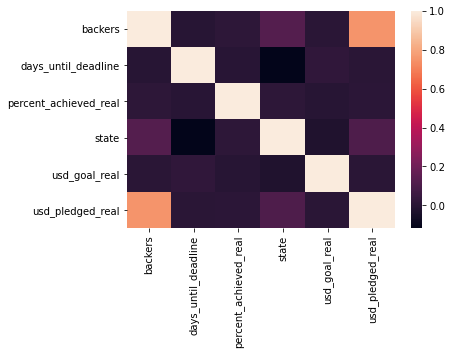

In [30]:
sns.heatmap(df_no_redundancies.corr())
plt.show()

From the heatmap above, it can be seen that `state` has a slightly strong positive correlation with `backers` and `usd_pledged_real`. Intuitively, this makes sense as an increase in the number of backers should result in an increase in both the amount of dollars pledged, and hopefully increase the project's chances of success.

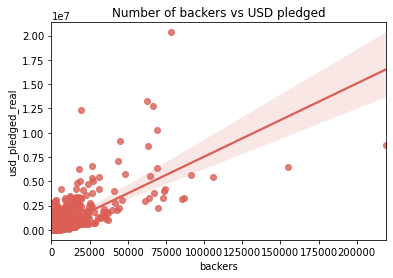

In [31]:
sns.regplot(x = 'backers', y = 'usd_pledged_real', data = df)
plt.title('Number of backers vs USD pledged')
plt.show()

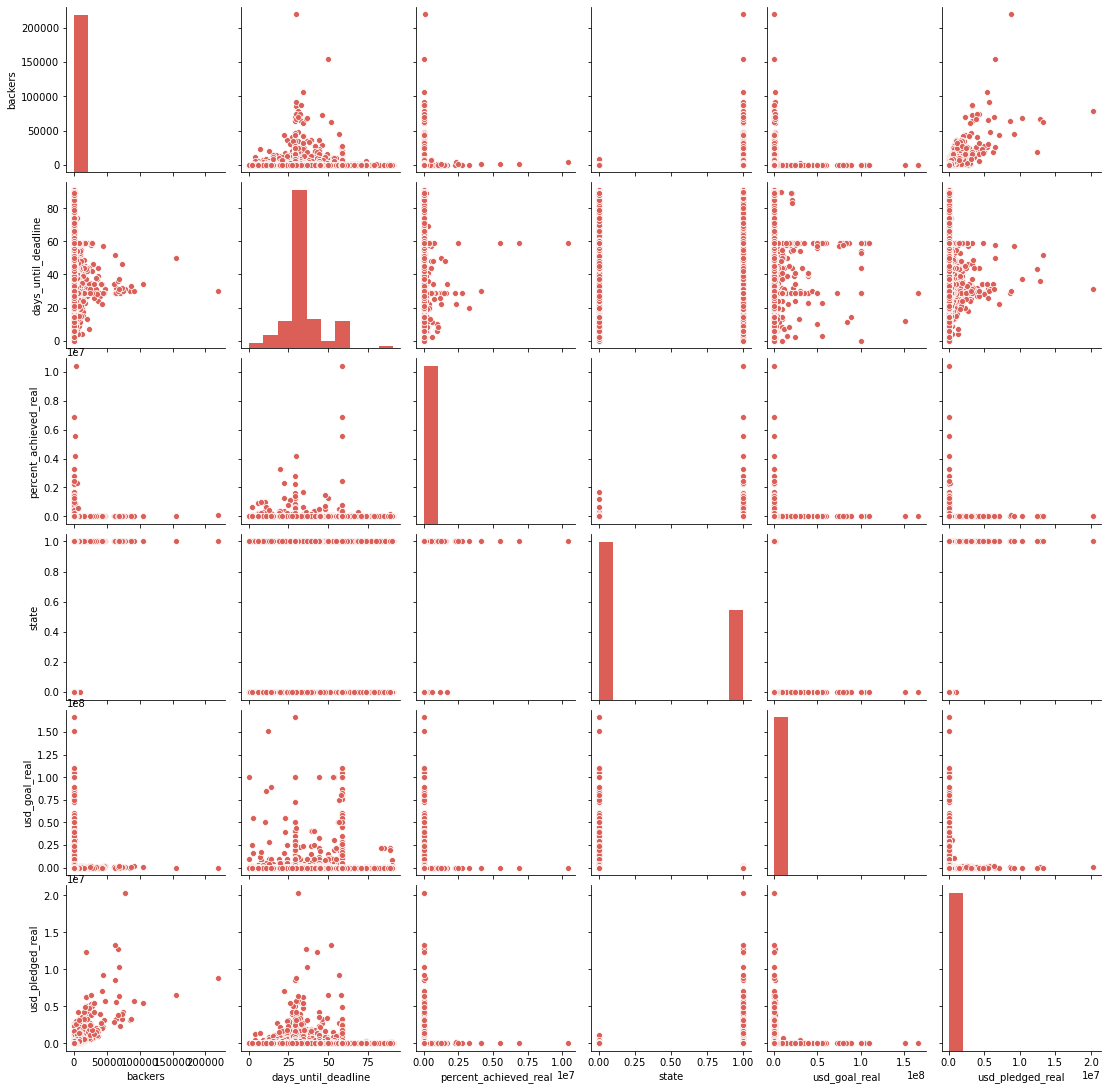

In [32]:
sns.pairplot(df_no_redundancies)
plt.show()

In [33]:
df.to_csv('data/after_eda.csv')
df_no_redundancies.to_csv('data/no_redundancies.csv')